# Visualizações do Fluxo

In [36]:
import numpy as np
import pandas as pd
import warnings 

warnings.filterwarnings("ignore")

from coder import Coder
from reviewer import Reviewer
from system import System
#from utils import epsilon_greedy_decay, calculate_reward, update_q_value

In [37]:
# Iris dataset
from sklearn.datasets import load_iris

In [38]:
iris = load_iris()

data = iris.data # Array
df = pd.DataFrame(data=iris.data, columns=iris.feature_names) # DataFrame

# As métricas iniciais poderiam ser o início de uma clusterização com o KMeans
initial_metrics = {
    "silhouette_score": 0.15,  
    "davies_bouldin_score": 2.1,  
    "n_clusters": 3
}

In [39]:
coder = Coder(data=data, df=df, evaluation_results_initial=initial_metrics)
reviewer = Reviewer(coder)
sistema = System(coder, reviewer)

sistema.train(epochs=3, epsilon=1.0, epsilon_min=0.01, decay_rate=0.99, size_penalty=0.5, lambda_silhouette=1, lambda_davies=3, lambda_k=0.5, lambda_size=0.5, t_min=10)


Epoch 0
Action: Normalize_Data
Response: {
  "categorical": "None",
  "integer": "",
  "boolean": "BinaryScaler",
  "float": "MinMaxScaler"
}
LLM Flag: True
Parameters Flag: False
Invalid n clusters flag: False
Metrics: {'silhouette_score': 0.15, 'davies_bouldin_score': 2.1, 'n_clusters': 3}
Reward:  -4.0
-------------------------


Epoch 1
Action: Change_Model
Response: 'dbscan'
labels: {np.int64(0), np.int64(1), np.int64(-1)}
LLM Flag: False
Parameters Flag: False
Invalid n clusters flag: False
Metrics: {'silhouette_score': np.float64(0.48603419703456857), 'davies_bouldin_score': np.float64(7.222448016359581), 'n_clusters': 2}
Reward:  -4.093907230737335
-------------------------


Epoch 2
Action: Fix_Parameters
Response: 0.5, 10
labels: {np.int64(0), np.int64(1), np.int64(-1)}
LLM Flag: False
Parameters Flag: False
Invalid n clusters flag: False
Metrics: {'silhouette_score': np.float64(0.4226852735832704), 'davies_bouldin_score': np.float64(3.75381894286625), 'n_clusters': 2}
Rewar

([[{'silhouette_score': 0.15, 'davies_bouldin_score': 2.1, 'n_clusters': 3},
   np.float64(-4.0),
   'Normalize_Data'],
  [{'silhouette_score': np.float64(0.48603419703456857),
    'davies_bouldin_score': np.float64(7.222448016359581),
    'n_clusters': 2},
   np.float64(-4.093907230737335),
   'Change_Model'],
  [{'silhouette_score': np.float64(0.4226852735832704),
    'davies_bouldin_score': np.float64(3.75381894286625),
    'n_clusters': 2},
   np.float64(-1.1795344317083842),
   'Fix_Parameters']],
 [(True, False, False), (False, False, False), (False, False, False)])

# Rewards Plot

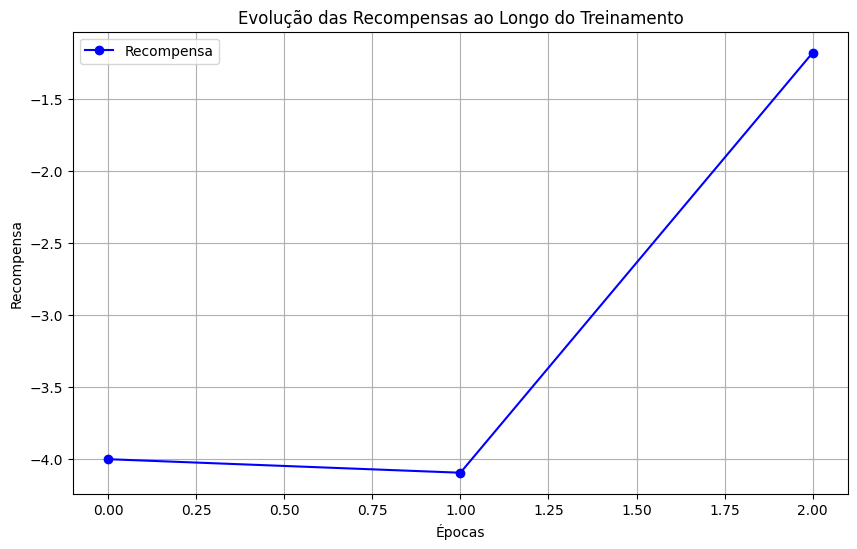

In [40]:
sistema.plot_rewards()

# Frequência de Ações

In [41]:
sistema.plot_action_frequency()

AttributeError: 'System' object has no attribute 'plot_action_frequency'

# Flags

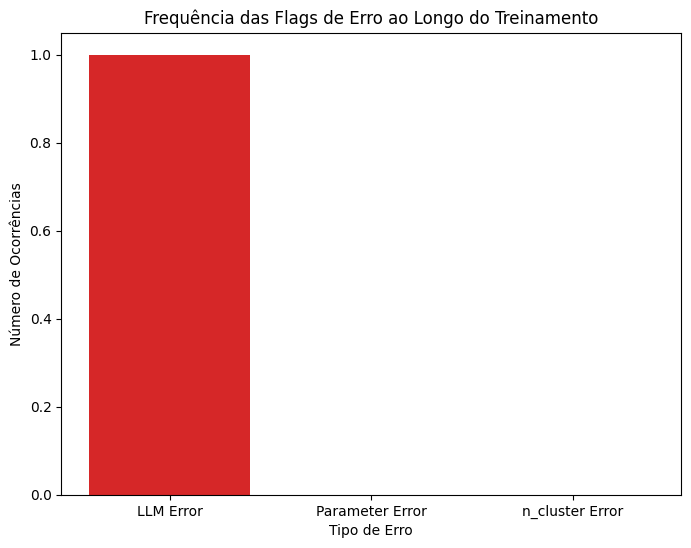

In [42]:
sistema.plot_error_flags()

# Média de Recompensa por Ação

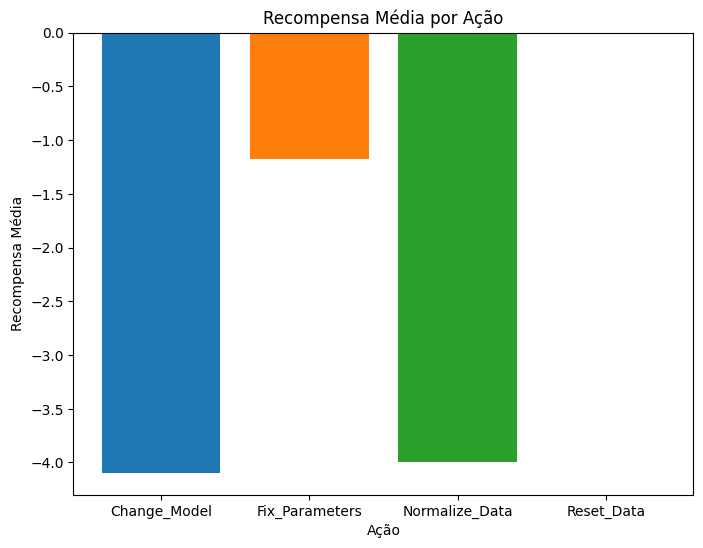

In [43]:
sistema.plot_average_reward_per_action()

# Distribuição das recompensas

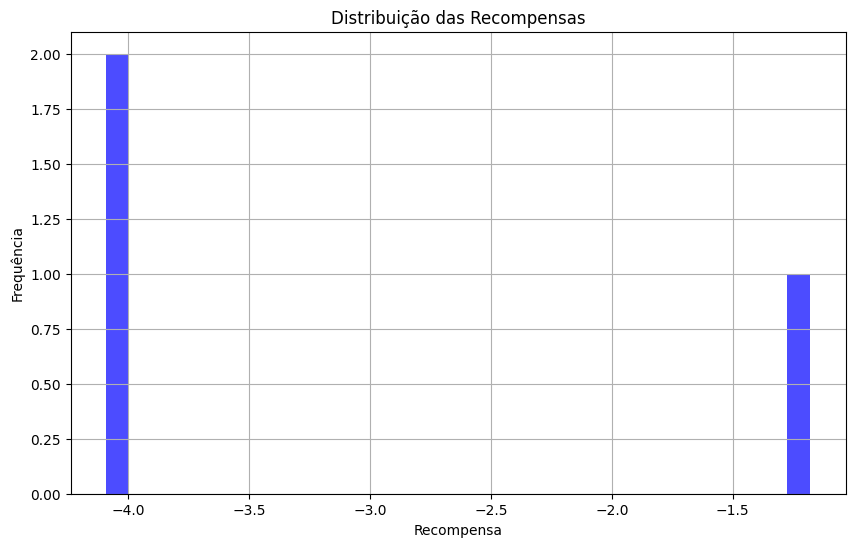

In [44]:
sistema.plot_reward_distribution()